# 0.0 imports

In [1]:
#dataprocess
import pandas as pd
import numpy  as np
import re
import inflection

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# 0.1 Help fucntion

# 1. Load Dataset 

In [2]:
dff = pd.read_csv('/home/win/Documentos/pa05/data/Ecommerce.csv', encoding='latin1')


In [3]:
df = dff

In [4]:
# Analisando os dados 
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [5]:
df['Unnamed: 8'].unique()

array([nan])

* coluna 'Unnamed: 8' deve ser dropada!

In [6]:
df.drop(columns = 'Unnamed: 8',  inplace = True)

# 2. Data Description

**Contexto**

Dados de comércio Eletrônico

**Conteúdo**

Este é um conjunto de dados transnacional que contém todas as transações que ocorrem entre 01/12/2010 e 09/12/2011 para um varejo on-line sem loja com sede no Reino Unido e registrado. A empresa vende principalmente presentes exclusivos de todas as ocasiões. Muitos clientes da empresa são atacadistas.

fonte: https://archive.ics.uci.edu/dataset/502/online+retail+ii

                            **Attribute Description**

InvoiceNo:    Número da fatura (um número integral de 6 dígitos atribuído exclusivamente a cada transação)

StockCode:    Código do produto (item)

Description:  Product (item) name

Quantity:     The quantities of each product (item) per transaction

InvoiceDate:  The day when each transaction was generated

UnitPrice:    Unit price (Product price per unit)

CustomerID:   Customer number (Unique ID assigned to each customer)

Country:      Country name (The name of the country where each customer resides)

Analysis tasks to be performed:

Use the clustering methodology to segment customers into groups:



| Nome variável       | Papel     | Tipo | Descrião do produto | Unidades de Ações | Valores perdidos|
|--------------|-----------|------------|------------|------------|------------|
| InvoiceNo (em voz) | ID     | Categorial   | um número integral de 6 dígitos atribuído exclusivamente a cada transação. **Se este código começar com a letra 'c', indica um cancelamento**|| No|
| Cod,o do stock     | ID     | Categorial       |um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto|| No|
|Description|	Feature|	Categorical|	product name|		|no|
|Quantity	|Feature|	Integer|	the quantities of each product (item) per transaction|		|no|
|InvoiceDate	|Feature	|Date|	the day and time when each transaction was generated|		|no|
|UnitPrice	|Feature	|Continuous	|product price per unit	|sterling|	no|
|CustomerID|Feature|Categorical|um número integral de 5 dígitos atribuído exclusivamente a cada cliente|	|no|
|Country|	Feature|	Categorical|	the name of the country where each customer resides|		|no|

| Item         | Price | # In stock |
|--------------|:-----:|-----------:|
| Juicy Apples |  1.99 |        739 |
| Bananas      |  1.89 |          6 |

## 2.1 Rename Columns

In [7]:
list(df.columns)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [8]:
cols_old = list(df.columns)

snakecase = lambda x : inflection.underscore( x )
cols_new = list(map(snakecase, cols_old))

df.columns = cols_new


## 2.2 Data Dimensions

In [9]:
print('Number of Rows: {}'.format( df.shape[0]))
print( 'Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 541909
Number of Cols: 8


## 2.3 Data Types

In [10]:
df.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [11]:
df['invoice_no'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

* coluna invoice_no, deve mudar seu tipo para int64

## 2.4 Check NA

In [12]:
df.isna().sum() 

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

In [13]:
(df.isna().sum() / 541909 ) *100

invoice_no       0.000000
stock_code       0.000000
description      0.268311
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     24.926694
country          0.000000
dtype: float64

REFLEXÃO p/ trabalhar com os NANs

**Objetivo do trabalhoh:** Usa a metodologia de clustering para segmentar clientes em grupos! 

Formas de tratar os NAN:

    * Deletar ( df.dropna() )
        * + (vantagem        -  Simples
        * - (Desvantagem )   -  Perda de informação
        * Goal               -  Depende da quantidade 
   
    * Preencher
        * + (vantagem        -  Mantém o tamanho original dos dados
        * - (Desvantagem )   -  Caso a distribuição n seja normal, pode fica com muito viés!
        * Goal               -  Atrapalharia na segmentação e interpretação do cliente!
    
    * Interpolar
        * + (vantagem        -  Mantém a integridade de seres temporais 
        * - (Desvantagem )   -  Pode distorcer com informações falsas
        * Goal               -  Segmentar o cliente errado no grupo, pois o mesmo pode aparecer mais de uma vez, com uma pequenas  diferança nas suas características.
    
    * Modelos Estatísticos
        * + (vantagem        -  Abordagem mais sofisticada 
        * - (Desvantagem )   -  Reque muito recurso do computador e pode ser impreciso
        * Goal               -  Pode acumular muita informação incorreta!

Conclusão: Melhor caminho, baseado na quantidade máximo de perda é 25% de perda de informação.

## 2.5 Fillout NAN ou Null

colunas com NA description, customer_id

In [14]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [15]:
df['description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [16]:
df['customer_id'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

##### Qual seria o plano
    * customer_id - O id, ele traz uma identificação do cliente, contudo
    * description - pode subtituir por "sem comentário"



###### Tentativa 1 ( X )

In [17]:
df1 = df.dropna()

In [18]:
df1.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

###### Tentativa 2

In [19]:
#df_missing     = df.loc[df1['customer_id'].isna(), :]
#df_not_missing = df.loc[~df1['customer_id'].isna(), :]

#create reference
#df_backup = pd.DataFrame(df_missing['invoice_no']).drop_duplicates()
#df_backup['customer_id'] = np.arange(19000, 19000 + len(df_backup), 1)

#merge original with reference dataframe
#df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

#coalesce 
#df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

#drop extra columns
#df1 = df1.drop(columns=['customer_id_x', 'customer_id_y'], axis=1)
#df1.head()


## 2.7 Change Type

In [20]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [21]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [22]:
# invoice_no
#df1['invoice_no']   = df1['invoice_no'].astype( int ) 

#invoice date
df1.loc[:, 'invoice_date'] = pd.to_datetime(df1.loc[:,'invoice_date'], format= '%d-%b-%y') 

#customer id
df1.loc[:, 'customer_id'] = df1.loc[:, 'customer_id'].astype(int)
df1.dtypes



invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

 ## 2.7 Descriptive Statistics

In [23]:
num_attributes = df1.select_dtypes( include = ['int64', 'int32', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'int32', 'float64', 'datetime64[ns]'] )

## 2.7.1 Numerical Attributes

In [24]:
#central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion 
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m1 = pd.concat([d2 ,d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m1 = m1.drop([2])
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]
m1


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988


## 2.7.2 Categorical Attributes

In [25]:
cat_attributes.head()

,invoice_no,stock_code,description,invoice_date,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2016-11-29 00:00:00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,2016-11-29 00:00:00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2016-11-29 00:00:00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2016-11-29 00:00:00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2016-11-29 00:00:00,United Kingdom


In [26]:
df_letter_invoices = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]

#check if the number of invoices that contains letters are igual with negative quantity
print('Total number of invoices: {}'.format(len(df_letter_invoices)))
print('Total number of negative quantity: {}'.format(len(df_letter_invoices[df_letter_invoices['quantity'] < 0])))



Total number of invoices: 8905
Total number of negative quantity: 8905


**Stock code**

In [27]:
cat_attributes.loc[cat_attributes['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), 'stock_code']

45        POST
141          D
386       POST
1123      POST
2239         M
          ... 
541216    POST
541541       M
541730    POST
541767    POST
541768    POST
Name: stock_code, Length: 1774, dtype: object

In [28]:
df1.loc[cat_attributes['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), :].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
45,536370,POST,POSTAGE,3,2016-11-29 00:00:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2016-11-29 00:00:00,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,2016-11-29 00:00:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2016-11-29 00:00:00,18.00,12662.0,Germany
2239,536569,M,Manual,1,2016-11-29 00:00:00,1.25,16274.0,United Kingdom


## 3.0 Filter Variables

In [29]:
df2 = df1

In [30]:
df2.describe()

,quantity,unit_price,customer_id
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [31]:
#unit price > 0.0
#df2 = df2.loc[df2['unit_price'] > 0.04, :]

#stock code different of ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']
#df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

#description
df2.drop(columns='description', axis=1, inplace = True)

#map New Feacture
#df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])] # isin(comparado) se comparado for igual ao de fora retorna True
#A ideia nesse código de cima está mal feito, a ideia ao que parece é pegar 
#todos os paídes da europa e subtituir por 'European Community' e fora por 'Unspecified'
# uma forma de fazer isso é criar uma lista country_europa, depois é só 
# df2['europeu'] = df2['country'].apply(lambda x : 1 if x is in country_europa else 0 )

#bad users
#df2 = df2[~df2['customer_id'].isin([16446])] #user com numero muito grande de retornos 

#quantity - dividing in return and purchase 
returns = df2.loc[df2['quantity'] < 0, :]
purchases = df2.loc[df2['quantity'] >= 0, :]

/tmp/ipykernel_698276/2185533012.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='description', axis=1, inplace = True)


# 4.0 Features Engineering

In [47]:
df4 = df2

In [48]:
# Image map mental

## 4.1 Create Engineering 

In [49]:
df4.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom


### 4.1.1 Time

In [50]:
#year
df3['year'] = df3['invoice_date'].dt.year

# month
df3['month'] = df3['invoice_date'].dt.month

df3['month_sin'] = df3['month'].apply(lambda x: np.sin( x* (2. * np.pi/12) ) )
df3['month_cos'] = df3['month'].apply(lambda x: np.cos( x* (2. * np.pi/12) ) )

/tmp/ipykernel_698276/3091160695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['year'] = df4['invoice_date'].dt.year
/tmp/ipykernel_698276/3091160695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['month'] = df4['invoice_date'].dt.month
/tmp/ipykernel_698276/3091160695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

### 4.1.2 Gross Revenue

In [51]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,-0.5,0.866025
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,-0.5,0.866025
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025


In [52]:
cancelled = df3[df3['quantity'] < 0]
cancelled.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos
141,C536379,D,-1,2016-11-29,27.50,14527.0,United Kingdom,2016,11,-0.5,0.866025
154,C536383,35004C,-1,2016-11-29,4.65,15311.0,United Kingdom,2016,11,-0.5,0.866025
235,C536391,22556,-12,2016-11-29,1.65,17548.0,United Kingdom,2016,11,-0.5,0.866025
236,C536391,21984,-24,2016-11-29,0.29,17548.0,United Kingdom,2016,11,-0.5,0.866025
237,C536391,21983,-24,2016-11-29,0.29,17548.0,United Kingdom,2016,11,-0.5,0.866025


In [53]:
sold = df3[df3['quantity'] > 0]
cancelled = df3[df3['quantity'] < 0]

#df3['gross_revenue'] = df3['quantity'].apply(lambda x: df3.loc[:,'quantity'] * df3.loc[:,'unit_price'] if x > 0 else 0)
# Observe que se produto retorna de algum lugar claro que tem um custo, mas não tenho informação para estimar,
#por isso ele é zero!
import numpy as np
df3['gross_revenue'] = np.where(df3['quantity'] > 0, df3['quantity'] * df3['unit_price'], 0)


/tmp/ipykernel_698276/1593291567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['gross_revenue'] = np.where(df4['quantity'] > 0, df4['quantity'] * df4['unit_price'], 0)


### 4.1.3 Devolvidos

In [56]:
df3['returned'] = np.where(df3['quantity'] < 0, 1, 0)

/tmp/ipykernel_698276/3969775380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['returned'] = np.where(df4['quantity'] < 0, 1, 0)


In [57]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos,gross_revenue,returned
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,-0.5,0.866025,15.30,0
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,-0.5,0.866025,22.00,0
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0


### 4.1.4 Recency - Days from last purchase

In [ ]:
filtro =  df3[df3['quantity'] > 0]


# 5.0 Exploratory Data Analysis

In [32]:
df4 = df3

In [33]:
# Image map mental

## 5.1 Creating of hypotheses

Embora a validação de hipóteses seja feito em Analise exploratória de dados, realizada aqui para aumentar familiariadade com dados 

### H1 - O país sede de origem do site é o que mais vende!

**TRUE**

In [34]:
aux = df4.loc[:,['country', 'quantity']].groupby('country').sum().sort_values('quantity', ascending = False)


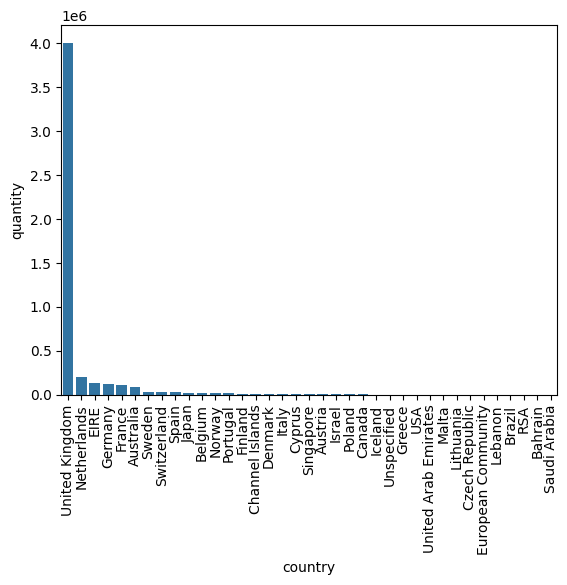

In [35]:
aux = df4.loc[:,['country', 'quantity']].groupby('country').sum().sort_values('quantity', ascending = False)
sns.barplot(x = 'country', y = 'quantity', data = aux)

plt.xticks( rotation = 90)

plt.show()

In [36]:
df4[['customer_id', 'country']].drop_duplicates().groupby('country').count().sort_values('customer_id',ascending = False )

,customer_id
country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


In [37]:
# Em porcentagem
df4['country'].value_counts(normalize = True).head()

country
United Kingdom    0.889509
Germany           0.023339
France            0.020871
EIRE              0.018398
Spain             0.006226
Name: proportion, dtype: float64

### H2 - Qual produto que mais vende

In [38]:
aux = df4.loc[df4['quantity']>= 0]
aux = aux.loc[:, ['stock_code', 'quantity']].groupby('stock_code').sum().sort_values('quantity', ascending = False)
aux

,quantity
stock_code,
23843,80995
23166,77916
84077,54415
22197,49183
85099B,46181
...,...
90024D,1
90025F,1
90011A,1


| Produto     | Description|    
|--------------|-----------|
|23843	|PAPER CRAFT , LITTLE BIRDIE|
|23166	|MEDIUM CERAMIC TOP STORAGE JAR|
|84077	|WORLD WAR 2 GLIDERS ASSTD DESIGNS|
|22197	|SMALL POPCORN HOLDER|	
|85099B	|JUMBO BAG RED RETROSPOT|


### H3 - De qual país é o cliente que mais compra

**o Cliente que mais compra é da United Kingdom**

In [39]:
df4.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,6,2016-11-29 00:00:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2016-11-29 00:00:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2016-11-29 00:00:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2016-11-29 00:00:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2016-11-29 00:00:00,3.39,17850.0,United Kingdom


In [40]:
aux = df4.loc[:,['country', 'customer_id', 'quantity']].groupby(['country', 'customer_id']).count().sort_values('quantity', ascending = False)
aux

quantity
country        customer_id          
United Kingdom 17841.0          7983
EIRE           14911.0          5903
United Kingdom 14096.0          5128
               12748.0          4642
               14606.0          2782
...                              ...
               15510.0             1
               18174.0             1
               15668.0             1
               14424.0             1
               15657.0             1

[4380 rows x 1 columns]

### H4 - Qual o periodo do ano que mais vende ?

Do mễs de outubro ao dezembro

In [41]:
df4.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,6,2016-11-29 00:00:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2016-11-29 00:00:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2016-11-29 00:00:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2016-11-29 00:00:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2016-11-29 00:00:00,3.39,17850.0,United Kingdom


In [42]:


# Converta a coluna 'Timestamp' para o formato datetime
df4['invoice_date'] = pd.to_datetime(df4['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df4[df4['invoice_date'].dt.year < 2017]
filtro

/tmp/ipykernel_698276/294313003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])


,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
42448,539988,84380,1,2016-12-21,1.25,18116.0,United Kingdom
42449,539988,84849D,1,2016-12-21,1.69,18116.0,United Kingdom
42450,539988,84849B,1,2016-12-21,1.69,18116.0,United Kingdom
42451,539988,22854,2,2016-12-21,4.95,18116.0,United Kingdom


In [43]:
# 2016
aux =  filtro.loc[:,['invoice_date', 'quantity']].groupby('invoice_date').sum().sort_values('quantity', ascending = False)
aux.head()

,quantity
invoice_date,
2016-12-14,29482
2016-11-29,24032
2016-12-06,21275
2016-11-30,20855
2016-12-05,19351


In [44]:
# 2017


# Converta a coluna 'Timestamp' para o formato datetime
df4['invoice_date'] = pd.to_datetime(df4['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df4[df4['invoice_date'].dt.year > 2016]
filtro
aux =  filtro.loc[:,['invoice_date', 'quantity']].groupby('invoice_date').sum().sort_values('quantity', ascending = False)
aux.head()

/tmp/ipykernel_698276/2251964163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])


,quantity
invoice_date,
2017-10-03,45741
2017-09-18,42626
2017-12-05,40994
2017-10-18,40780
2017-12-03,38305


### H5 - Qual o periodo do ano que menos vende?
Fevereiro e Março

In [45]:
# 2016


# Converta a coluna 'Timestamp' para o formato datetime
df4['invoice_date'] = pd.to_datetime(df4['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df4[df4['invoice_date'].dt.year > 2016]
filtro
aux =  filtro.loc[:,['invoice_date', 'quantity']].groupby('invoice_date').sum().sort_values('quantity', ascending = True)
aux.head()

/tmp/ipykernel_698276/3871693673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])


,quantity
invoice_date,
2017-02-04,2048
2017-02-11,2715
2017-03-11,2741
2017-07-01,3106
2017-08-12,3135


In [46]:
# 2017


# Converta a coluna 'Timestamp' para o formato datetime
df4['invoice_date'] = pd.to_datetime(df4['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df4[df4['invoice_date'].dt.year > 2016]
filtro
aux =  filtro.loc[:,['invoice_date', 'quantity']].groupby('invoice_date').sum().sort_values('quantity', ascending = True)
aux.head()

/tmp/ipykernel_698276/4126333457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])


,quantity
invoice_date,
2017-02-04,2048
2017-02-11,2715
2017-03-11,2741
2017-07-01,3106
2017-08-12,3135


## 5.2 Analise Univariada

Analise univariada, não será possível já que não uma coluna predição ainda, a não ser que faça. 
Seria 1 para vendido, -1 ou 0 para cancelado. Como a ideia é segmentar em grupo, ter uma coluna desta não
severia muito em primeira analise.

### 5.2.1 invoice_no

### 5.2.2 stock_code

### 5.2.3 quantity

### 5.2.4 invoice_date

### 5.2.5 unit_price

### 5.2.5 customer_id

### 5.2.5 country